# Activity 7
**1. What are the inputs and outputs in the function model? What kind of objects are they?**

The growth rate (k), the state variable (N and P), and time (t) are the inputs in the function model. Time and k are scalars and the state variable is an array. The outputs are an array of derivatives that show the change in nutrient concentrations N and P.

**2. Write a new model to simulate the nutrient-phytoplankton-detritus system (NPD). Include a detritus variable D that is produced from the mortality of phytoplankton and it is remineralized as a nutrient. This will involve adding 2 new parameters: the mortality rate (phytoplankton lysis) and the remineralization rate.**

The model equations can be written using latex. Check the code in the inital cell above. Otherwise you can use the equation editor on Word or LibreOffice.

The dynamics of the nutrient-phytoplankton-detritus (NPD) system are described by the following equations:

\begin{align*}
\frac{dN}{dt} &= \underbrace{-k \cdot N \cdot P}_{\text{Nutrient Consumption}} + \underbrace{r \cdot D}_{\text{Remineralization}} \\
\frac{dP}{dt} &= \underbrace{k \cdot N \cdot P}_{\text{Nutrient Uptake}} - \underbrace{m \cdot P}_{\text{Mortality}} \\
\frac{dD}{dt} &= \underbrace{m \cdot P}_{\text{Detritus Production}} - \underbrace{r \cdot D}_{\text{Remineralization}}
\end{align*}

where:

- \( N \) represents the nutrient concentration,
- \( P \) represents the phytoplankton concentration,
- \( D \) represents the detritus concentration,
- \( k \) is the interaction coefficient between nutrient and phytoplankton,
- \( m \) is the mortality rate of phytoplankton, and
- \( r \) is the rate of remineralization of detritus back to nutrient.

**3. Write the code to solve the new model using odeint and propose some reasonable values for the parameters that lead to a realistic solution.**

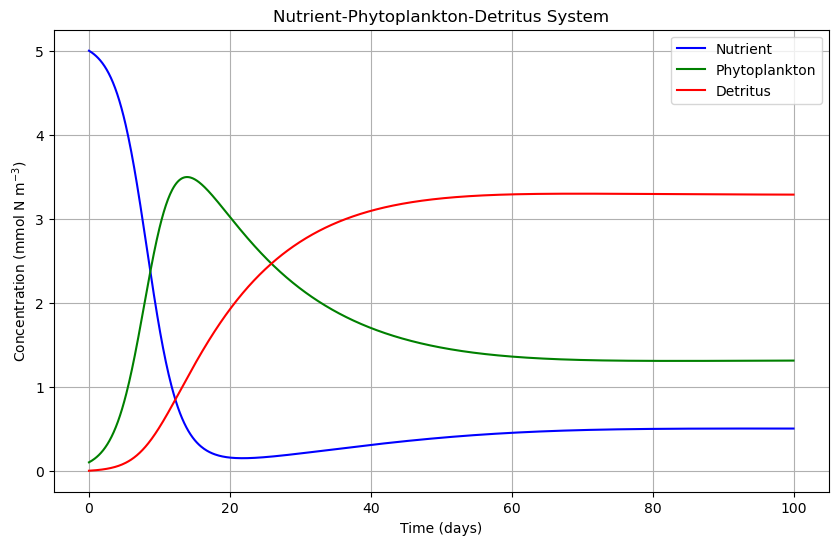

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Model function
def model(state, t, k, m, r):
    """
    Model for simulating a nutrient-phytoplankton-detritus (NPD) system.

    Args:
    state (array-like): Current state of the system [N, P, D], where:
                        N - nutrient concentration
                        P - phytoplankton concentration
                        D - detritus concentration
    t (float): Current time
    k (float): Interaction coefficient between nutrient and phytoplankton
    m (float): Mortality rate of phytoplankton (e.g., due to lysis)
    r (float): Rate of remineralization of detritus back to nutrient

    Returns:
    array-like: Array containing the derivatives of the state variables [dNdt, dPdt, dDdt],
                representing the rate of change of nutrient, phytoplankton, and detritus concentrations.
    """
    N, P, D = state
    
    # Rate equations
    dNdt = -k * N * P+ r*D
    dPdt = k * N * P - m * P
    dDdt = m * P - r * D
    
    return np.array([dNdt, dPdt, dDdt])

# Initial conditions
N0 = 5  # Initial nutrient concentration
P0 = 0.1  # Initial phytoplankton concentration
D0 = 0.0  # Initial detritus concentration
state0 = [N0, P0, D0]

# Time points
t = np.linspace(0, 100, 1000)  # Time points from 0 to 100 days

# Parameters
k = 0.1  # Interaction coefficient between nutrient and phytoplankton
m = 0.05  # Mortality rate of phytoplankton
r = 0.02  # Rate of remineralization of detritus

# Solve the ODE
solution = odeint(model, state0, t, args=(k, m, r))

# Extracting solution components
N, P, D = solution.T

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, N, 'b', label='Nutrient')
plt.plot(t, P, 'g', label='Phytoplankton')
plt.plot(t, D, 'r', label='Detritus')
plt.xlabel('Time (days)')
plt.ylabel('Concentration (mmol N m$^{-3}$)')
plt.title('Nutrient-Phytoplankton-Detritus System')
plt.legend()
plt.grid(True)
plt.show()